<a href="https://colab.research.google.com/github/oweskhan77/Eda-on-Hotel-booking-Analysis/blob/main/Eda_on_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

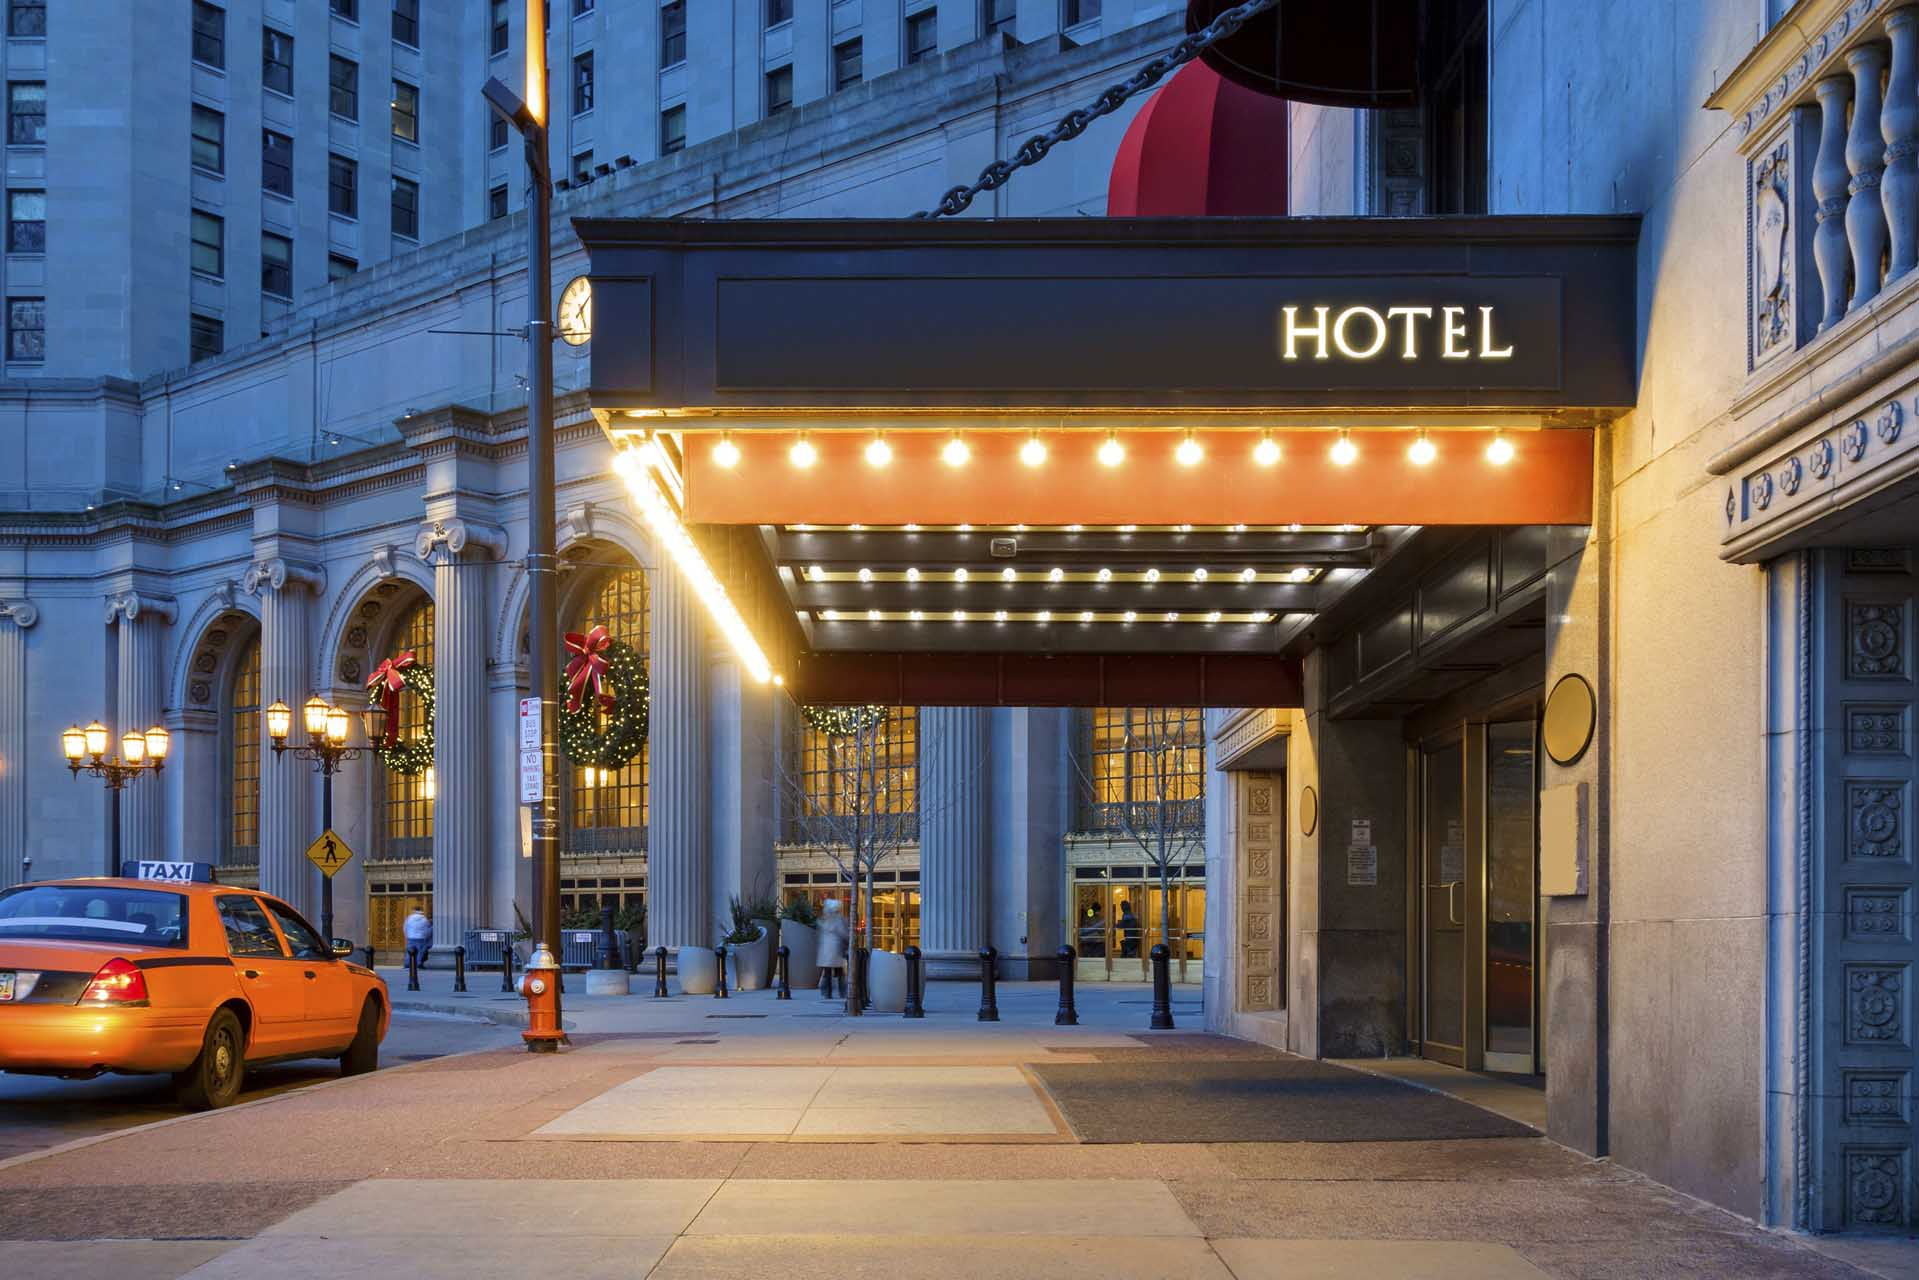

In [ ]:
#adding image to colab
Image('hotel.jpg',width=1080,height=720)


In [ ]:
uploaded=files.upload()

Saving hotel.jpg to hotel.jpg


In [ ]:
from google.colab import files
from IPython.display import Image

# Importing all essential python libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

# Mounting Drive

In [2]:
#mounting drive in colab
from google.colab import drive                   
drive.mount('/content/drive')                 

Mounted at /content/drive


#Path of csv data file 

In [3]:
#Defining path of csv file from drive
path='/content/drive/MyDrive/Almabetter/PROJECTS/EDA HOTEL BOOKING ANALYSIS/ Hotel Bookings.csv'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Importing and Inspection the Data

In [5]:
#importing  data using pd
hotel=pd.read_csv(path)

#make copy of dataftame
df=hotel.copy()

#looking top 5 rows of dataframe
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
#checking the shape ( rows and column numbers)
print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 119390 rows and 32 columns.


###Understandig the  meaning of columns for better exploration, we will see the unique values attained by each column whose meaning we are unable to understand.

In [7]:
df.columns                 #checking the names of colummns in dataframe

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [9]:
df['is_canceled'].unique()

array([0, 1])

In [10]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [11]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [12]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [13]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [14]:
df['is_repeated_guest'].unique()

array([0, 1])

# Let's look at the statistical aspects of the dataframes df

In [15]:
#understanding numerical data wiith some values as count,mean,min,max..etc.
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#checking datatypes

In [16]:
#getting all the information of our data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

###Creating list of continous and categorical data

In [17]:
# creating numerical and categorical dataframes
con_cols=[col for col in df.columns if (df[col].dtype == 'int64' or df[col].dtype == 'float64'or df[col].dtype == '<M8[ns]')]  #df['reservation_status_date'].dtpye() --->    dtype('<M8[ns]')

cat_cols =[col for col in df.columns if df[col].dtype == 'O']

print(f'Continous columns:-',con_cols,'\n')
print(f'Categorical columns:-',cat_cols,'\n')
print(f'there are continous columnsand:-',{len(con_cols)},'and categorical columns are',{len(cat_cols)})

Continous columns:- ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests'] 

Categorical columns:- ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date'] 

there are continous columnsand:- {20} and categorical columns are {12}


### The dataset have 32 variables (Continuous and Categorical) with one identified dependent variable (categorical), which is 'is_cancelled.

#Feature Engneering or Cleaning the data
Feature engineering refers to manipulation — addition, deletion, combination, mutation — of your data set to improve machine learning model training, leading to better performance and greater accuracy.

Cleaning data is important step before EDA as it will remove the unwanted data that can affect the outcome of  our EDA.

While cleaning data we will perform following steps: \ 1) Deleting duplicate rows \ 2) Handling missing values. \ 3) Convert columns to appropriate datatypes. \ 4) Adding important columns

##Step 1: Removing duplicate rows if any present :-

In [20]:
df[df.duplicated()].shape   # Show no. of rows of duplicate rows duplicate rows


(0, 32)

In [21]:
# Dropping duplicate values
df.drop_duplicates(inplace = True)
df.shape

(87396, 32)

##Step2: Handling missing values.

In [22]:
# Columns having missing values.
df.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

####Since, company and agent columns have comany number and agent numbers as data. There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns. \ We will replace null values by 0 in these columns



In [23]:
df[['company','agent']] = df[['company','agent']].fillna(0)

####This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction. \ So, 'nan' values are the missing values due to error of recording data. \ \ We will replace the null values under this column with mean value of children.

In [24]:
df['children'].fillna(df['children'].mean(), inplace = True)

####Next column with missing value is 'country'. This column represents the country of customer. \ Since, this column has datatype of string. We will replace the missing value with the 'others'.

In [25]:
df['country'].fillna('others', inplace = True)

###checking percentage of null values in each column

In [26]:
print(round(100*(df.isnull().sum()/len(df.index)),2))

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
company                           0.0
days_in_waiting_list              0.0
customer_typ

###Step 3: Converting columns to appropriate datatypes.

In [27]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [28]:
# changing datatype of column 'reservation_status_date' to data_type.
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

###Step 4: Adding some  important columns for better exploration.

In [29]:
# Adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df['total_people'] = df['adults']+df['children']+df['babies']

In [30]:
# droppping all 166 those rows in which total_pepole is 0. That simply means  no bookings were made.
df.drop(df[df['total_people']==0].index,inplace=True)

### Now all null values are removed  and data is better for Exploration.

In [31]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2


In [32]:
#Dataframe df2 where cancellation of booking =0 means confermed the
df2=df[df['is_canceled']==0]


#EDA - Exploratory Data Analysis

##Univariate Analysis
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable.

##Q1]Which type of hotels is mostly preferd by the guest?

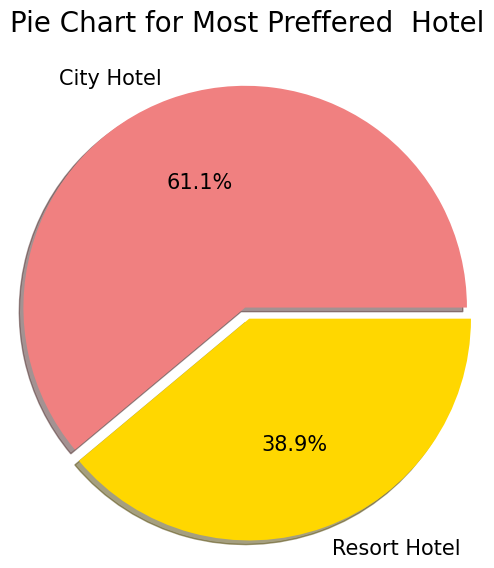

In [33]:
plt.pie(df['hotel'].value_counts(),labels=df['hotel'].value_counts().index.tolist(),explode=[0.04, 0.04], autopct='%1.1f%%',colors=[ 'lightcoral','gold'], shadow=True,radius=1.5,textprops={'fontsize': 15, 'fontweight': 'medium'})
plt.title('Pie Chart for Most Preffered  Hotel',loc='center',pad=70,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

###Observation
City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings which is 61.07%.

###Q2) which hotel seems to make more revenue?

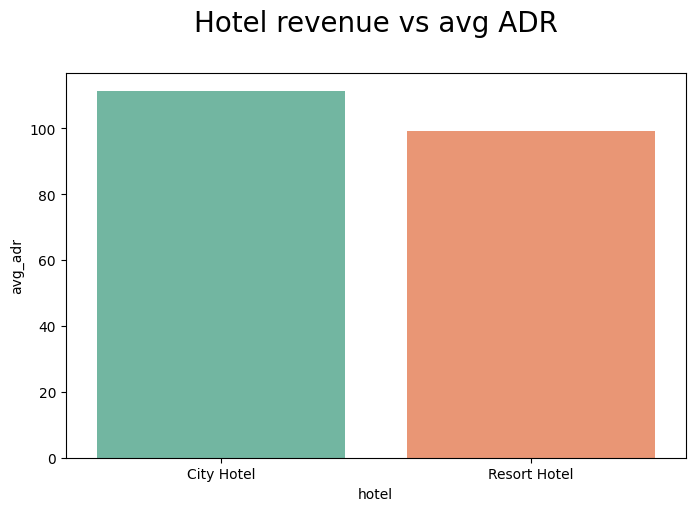

In [34]:
d3 =df.groupby('hotel')['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr with np.mean
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'],palette='Set2')
plt.title('Hotel revenue vs avg ADR',loc='center',pad=30,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

###Observations:-
Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

###Q3]Which Agent made the most bookings?

In [35]:
# return highest bookings made by agents
highest_bookings= df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most Bookings count" }).sort_values(by='Most Bookings count',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

#top_ten_highest_bookings

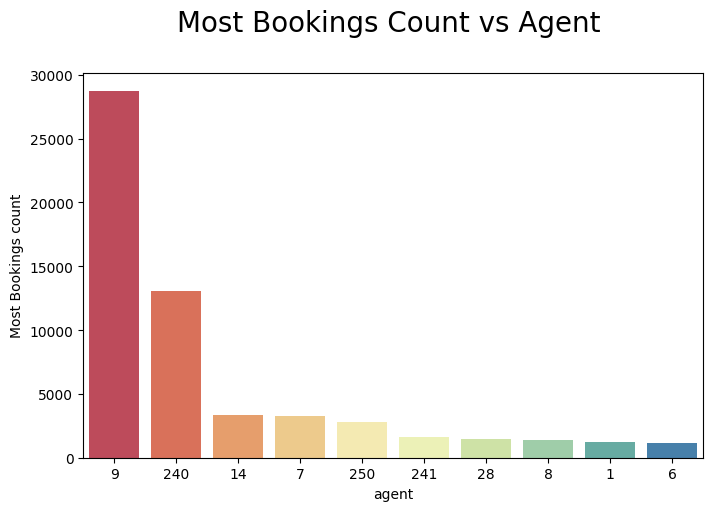

In [36]:
#ploting bar 
plt.figure(figsize = (8,5))
sns.barplot(x =top_ten_highest_bookings['agent'], y =top_ten_highest_bookings['Most Bookings count'],palette='Spectral',order=top_ten_highest_bookings['agent'])
plt.title('Most Bookings Count vs Agent ',loc='center',pad=30,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

###Observations:-
Agent number 9 made the most booking more than 25k.

###Q4]From which country the most guests are coming?

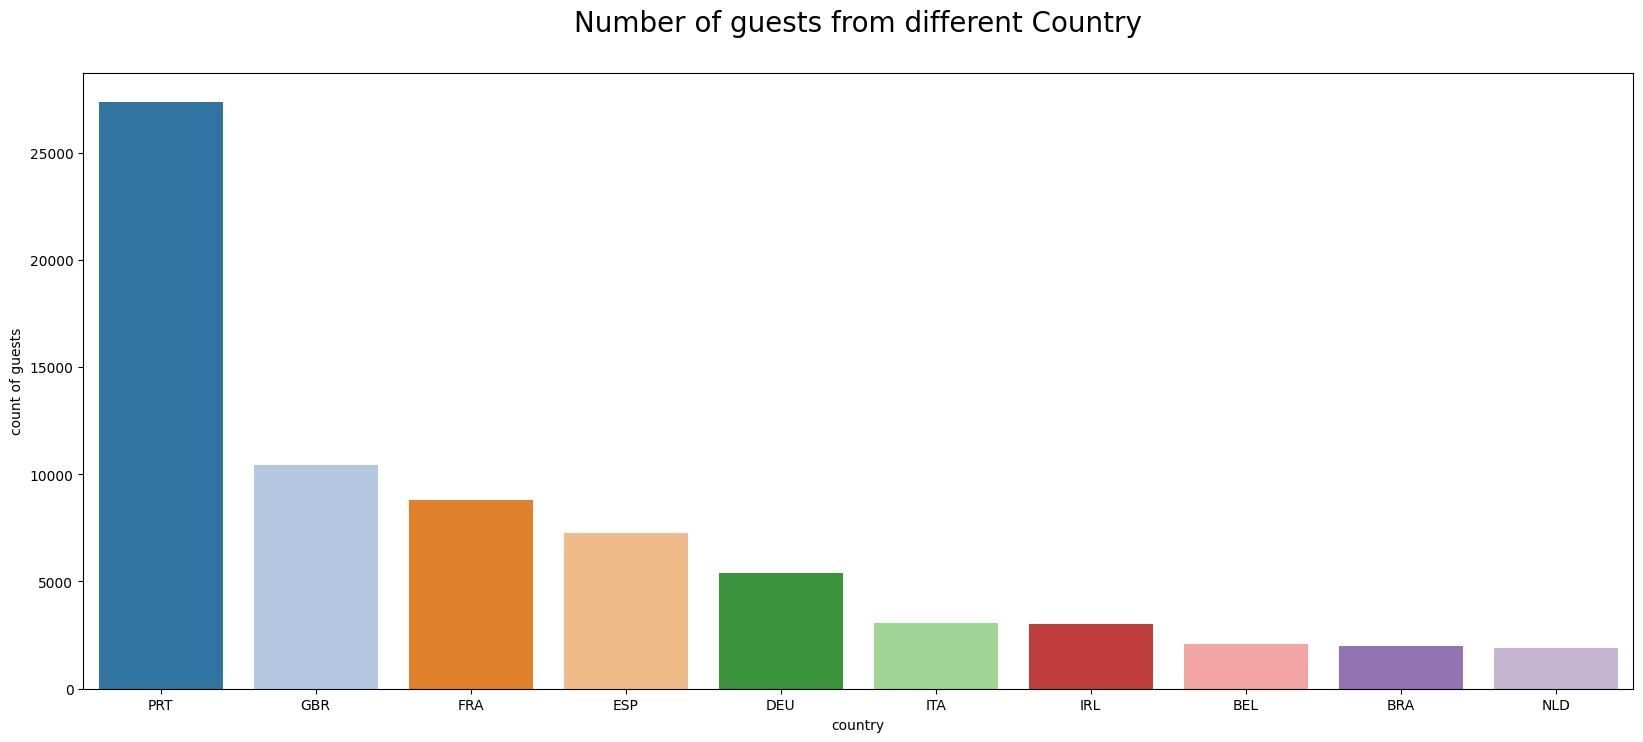

In [37]:
country_df = df['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]

plt.figure(figsize=(20, 8))
sns.barplot(x=country_df['country'], y=country_df['count of guests'],palette='tab20')
plt.title("Number of guests from different Country",loc='center',pad=30,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

### Observation:-
People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.

###Q5] Which meal type is most preffered meal of customers?

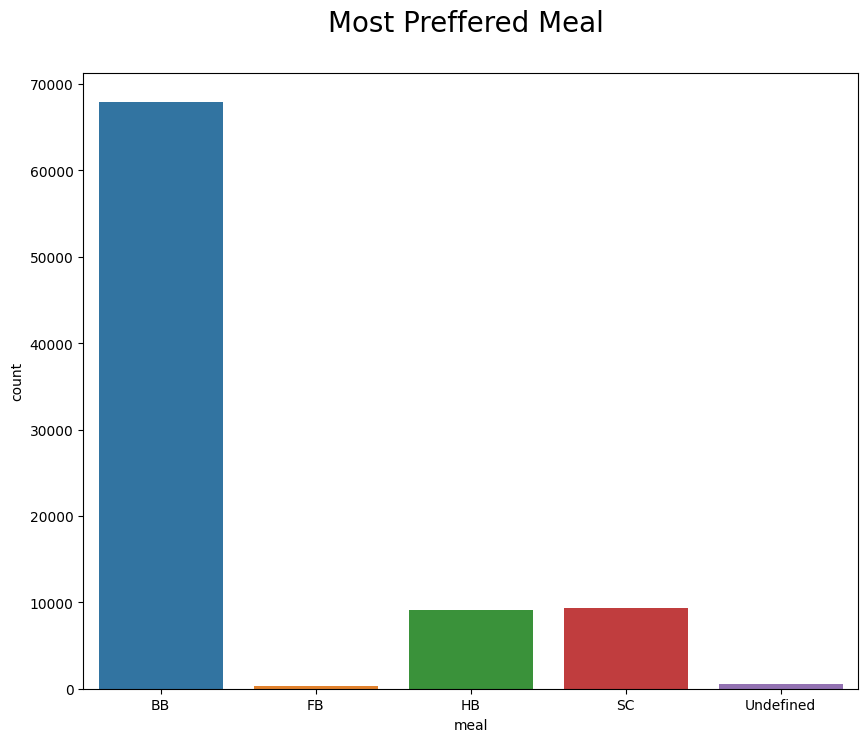

In [38]:
plt.figure( figsize=(10, 8))
sns.countplot(x = df['meal'],palette='tab10')
plt.title("Most Preffered Meal ",loc='center',pad=30,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

###Observation
Most preferred meal type is BB (Bed and breakfast).

Types of meal in hotels:

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)

SC- (Self Catering)

###Q6]-Which room type is in most demand?



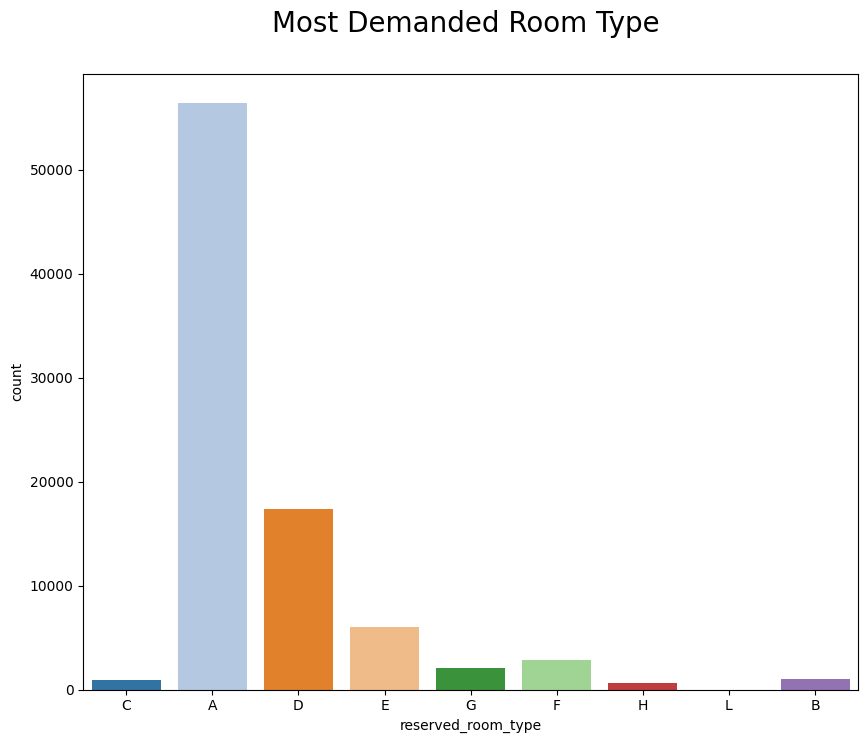

In [39]:
#most reserved room type
plt.figure( figsize=(10, 8))
sns.countplot(x= df['reserved_room_type'],palette='tab20')
plt.title("Most Demanded Room Type ",loc='center',pad=30,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

###Observation
Most demanded room type is A.

###Q7]What is the Percentage of repeated guests?

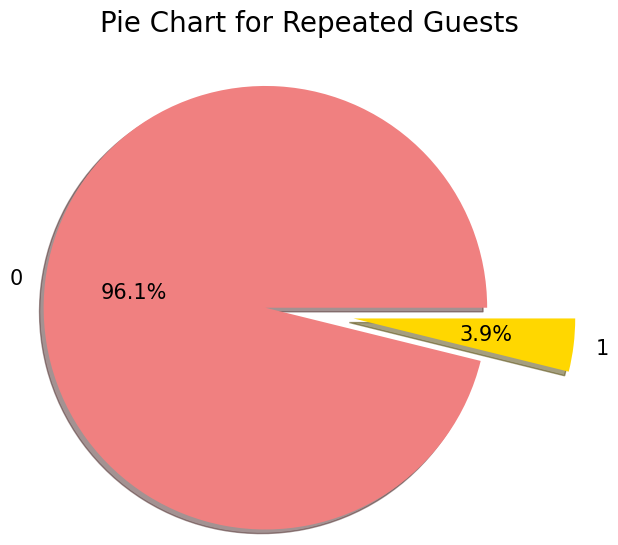

In [40]:
plt.pie(df['is_repeated_guest'].value_counts(),labels=df['is_repeated_guest'].value_counts().index.tolist(),explode=[0.3, 0.3], autopct='%1.1f%%',colors=[ 'lightcoral','gold'], shadow=True,radius=1.5,textprops={'fontsize': 15, 'fontweight': 'medium'})
plt.title('Pie Chart for Repeated Guests',loc='center',pad=70,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

###Observation
Only 3.86% guests are  repeated and remaining are new guests.

In order to retained the guests provide good hospitality, take feedbacks, and try imporve the services as per requirments.  

###8]What is the percentage distribution of required_car_parking_spaces?

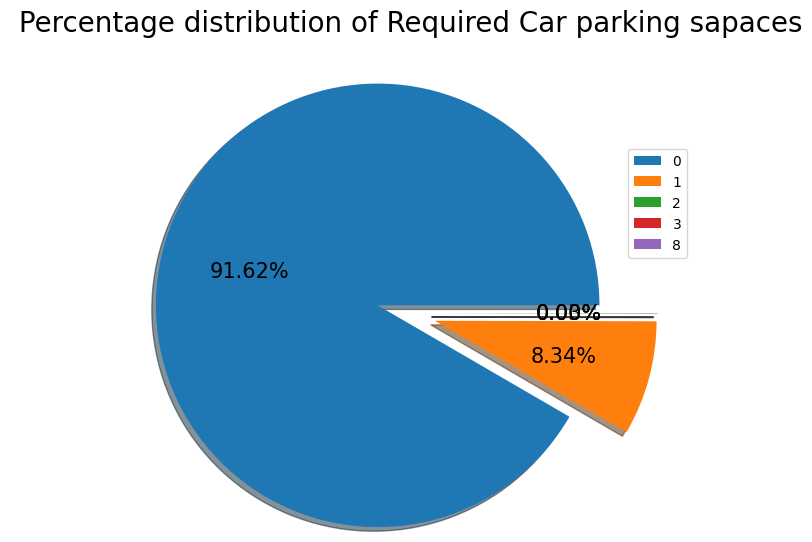

In [41]:
plt.pie(df['required_car_parking_spaces'].value_counts(),explode=[0.2]*5, autopct='%1.2f%%', shadow=True,radius=1.5,textprops={'fontsize': 15, 'fontweight': 'medium'})
plt.title(' Percentage distribution of Required Car parking sapaces',loc='center',pad=70,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.legend(loc=(1.1,.65), labels=df['required_car_parking_spaces'].value_counts().index.tolist())
plt.show()

###Observation
91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.

###9]Which year has the most bookings done?

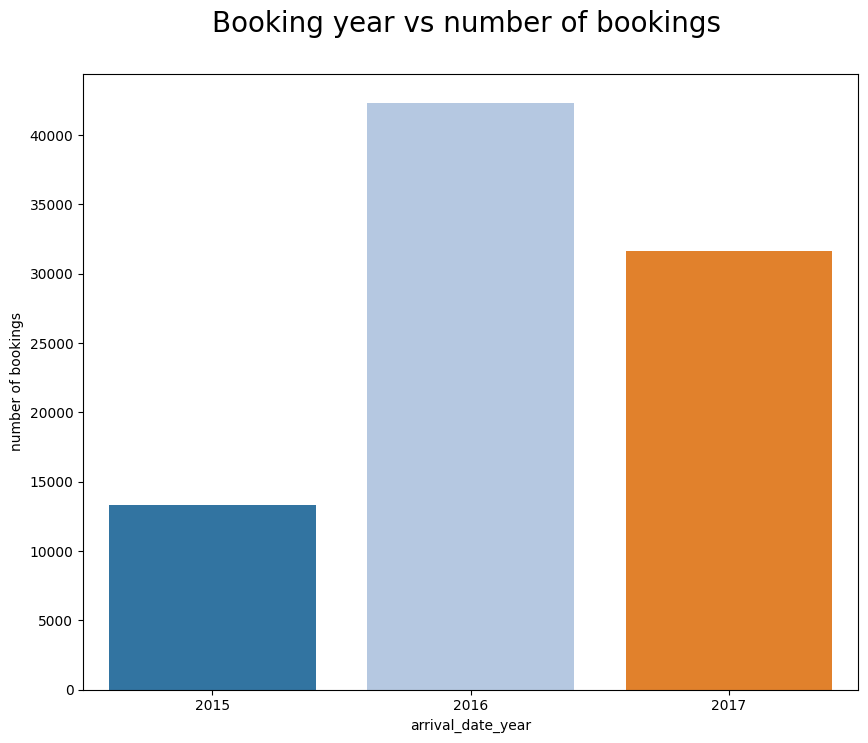

In [42]:
plt.figure( figsize=(10, 8))
sns.countplot(x= df['arrival_date_year'],palette='tab20')
plt.title("Booking year vs number of bookings ",loc='center',pad=30,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.ylabel("number of bookings")
plt.show()




###Observation:

2016 Year has the most  bookings 40k

2015 has less than 15k bookings

###10]Percentage distribution channel

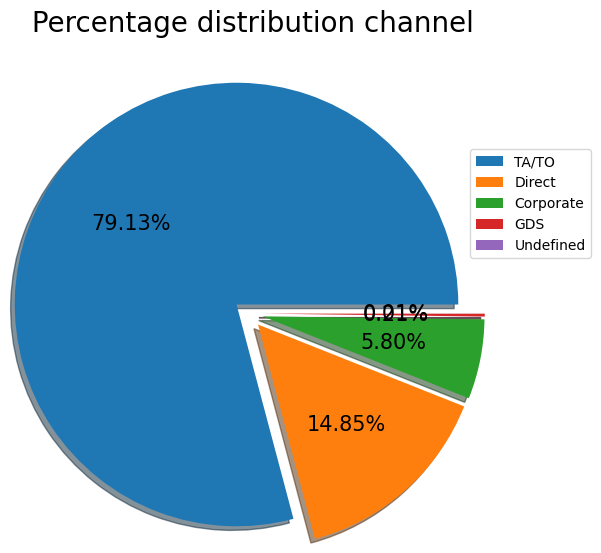

In [43]:
plt.pie(df['distribution_channel'].value_counts(),explode=[0.1]*5, autopct='%1.2f%%', shadow=True,radius=1.5,textprops={'fontsize': 15, 'fontweight': 'medium'})
plt.title(' Percentage distribution channel',loc='center',pad=70,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.legend(loc=(1.1,.65), labels=df['distribution_channel'].value_counts().index.tolist())
plt.show()

###Observations
79% distribution channel is TA/TO

In [44]:
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,114.251636
1,August,122.825388
2,December,90.769559
3,February,88.210810
4,January,83.378062
5,July,120.069489
6,June,120.673753
7,March,91.306933
8,May,124.825944
9,November,88.271089


###11]which is the most preferred market segment?

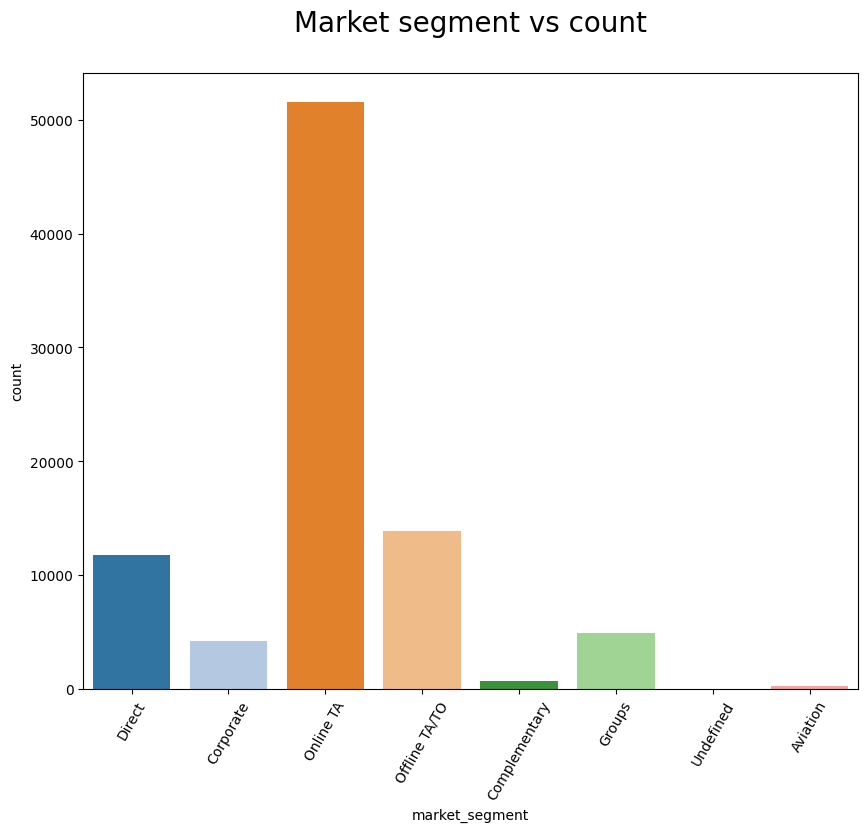

In [45]:
plt.figure( figsize=(10, 8))
sns.countplot(x= df['market_segment'],palette='tab20')
plt.title("Market segment vs count",loc='center',pad=30,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.xticks(rotation=60)
plt.show()




###Observation
 Most of the market segment used Online TA.

###12]Percentage distribution of Deposit type

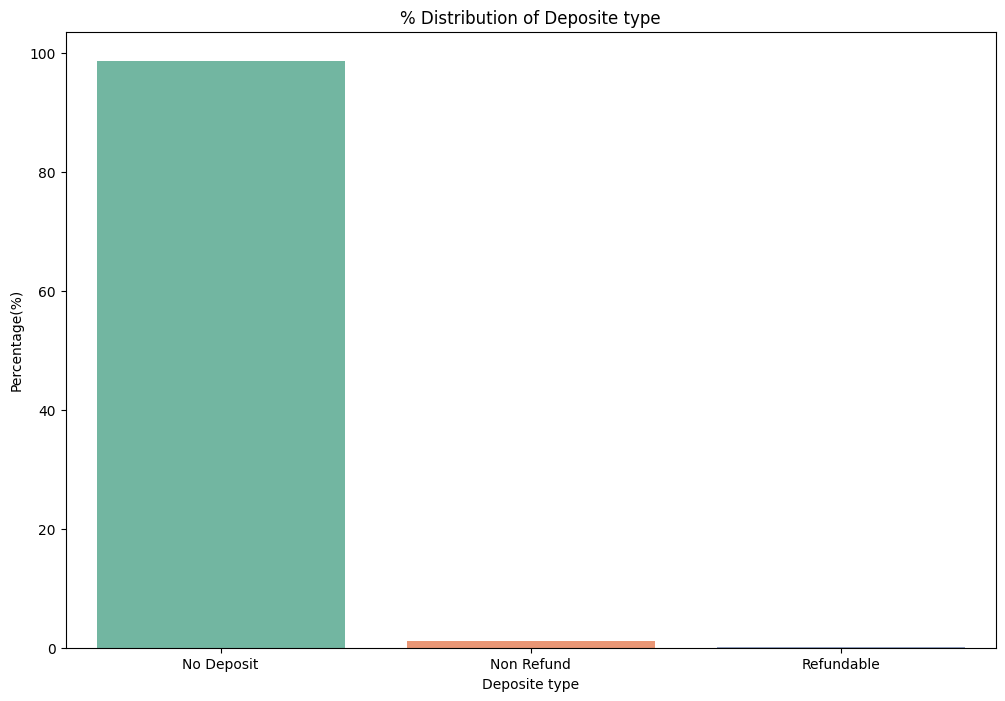

In [46]:
#percentage of deposite type calculations
deposit_df=df['deposit_type'].value_counts().reset_index().rename(columns={'index': "type",'deposit_type':'Counts'})
plt.figure(figsize=(12,8))
sns.barplot(x=deposit_df['type'],y=deposit_df['Counts']*100/df.shape[0],palette='Set2')
plt.title("% Distribution of Deposite type")
plt.xlabel('Deposite type')
plt.ylabel('Percentage(%)')
plt.show()

###Observations
 Almost 98 % of the guests prefer "No deposit" type of deposit so more chances of booking cancelation.


###13]What is the percentage of booking cancelation?

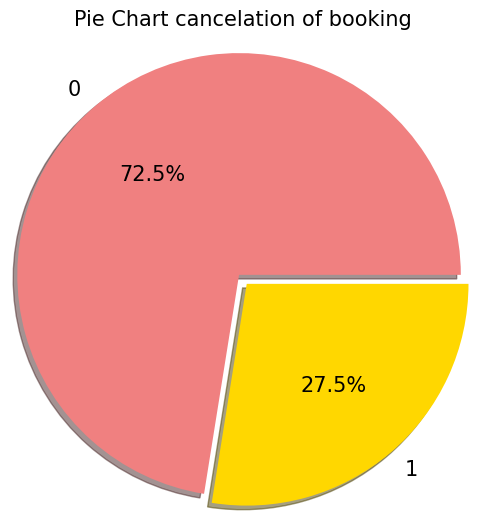

In [47]:
plt.pie(df['is_canceled'].value_counts(),labels=df['is_canceled'].value_counts().index.tolist(),explode=[0.04, 0.04], autopct='%1.1f%%',colors=[ 'lightcoral','gold'], shadow=True,radius=1.5,textprops={'fontsize': 15, 'fontweight': 'medium'})
plt.title('Pie Chart cancelation of booking',loc='center',pad=50,fontdict={'fontsize': 15, 'fontweight': 'medium'})
plt.show()

###Observation
0 means no cancelation of booking ,It is 72.5%.

1 means cancelation of booking,It is 27.5%.

##Bivariate and Multivariate Analysis
A Bivariate analysis is will measure the correlations between the two variables.
Multivariate analysis is will measure the correlations between more than two variables.

###1]what is the booking cancelation numbers  withrespect to hotel?


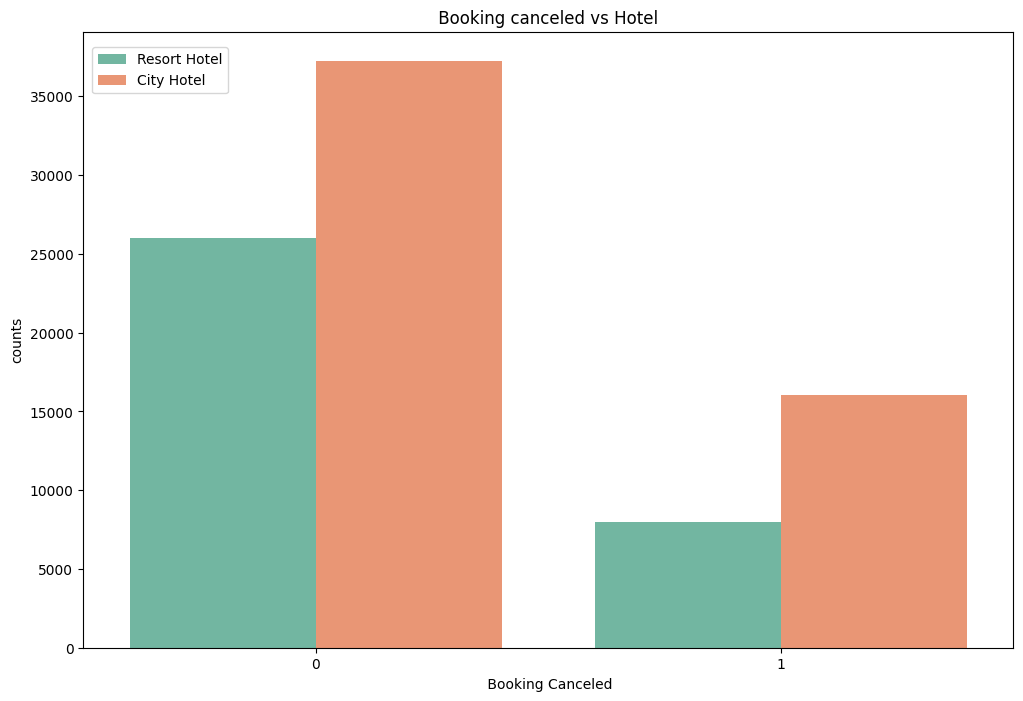

In [48]:
#is_canceled_df=df['is_canceled'].value_counts().reset_index().rename(columns={'index': "type",'is_canceled':'Counts'})
plt.figure(figsize=(12,8))
sns.countplot(x=df['is_canceled'],palette='Set2',hue=df['hotel'])
plt.title(" Booking canceled vs Hotel ")
plt.xlabel(' Booking Canceled')
plt.ylabel('counts')
plt.legend(loc=(.01,.9))
plt.show()

###Observation

Booking cancelation of city hotel is more as compared to resort hotel.

Almost 15k city hotel booking is canceled.



###2]which is the the most prefered hotel type by different country guests?

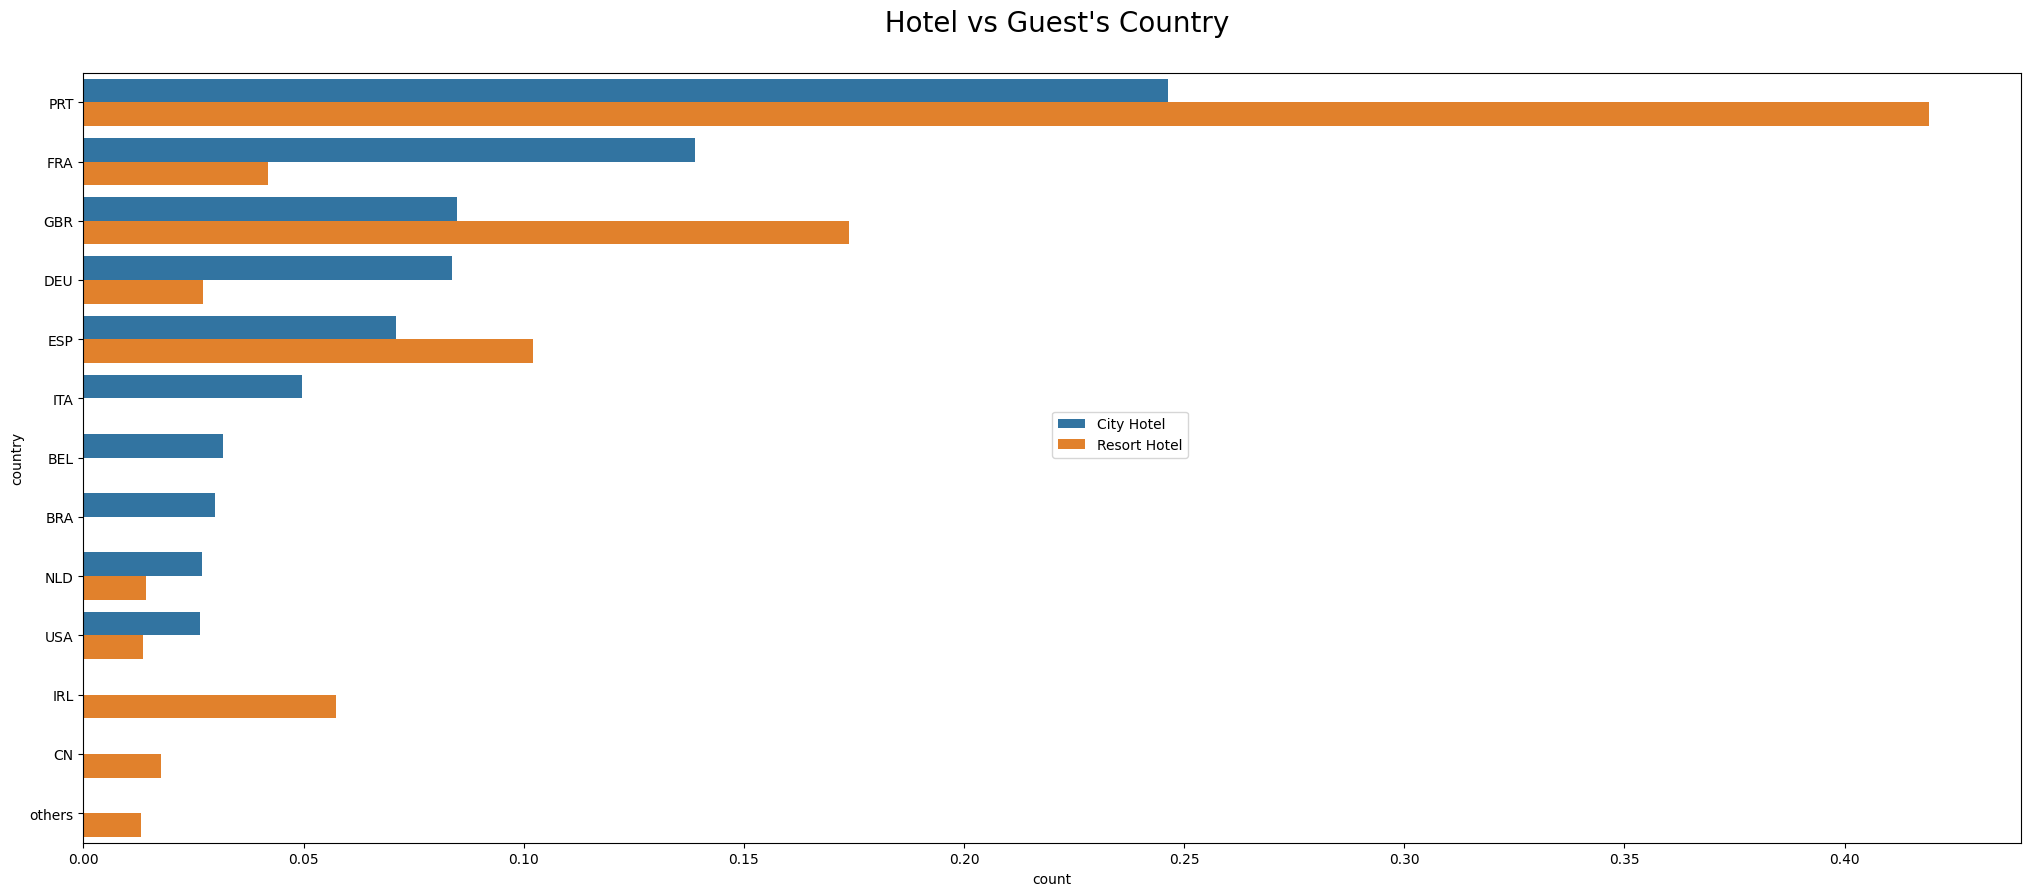

In [49]:
#filter by city hotel type
city_hotels=df["hotel"] == "City Hotel"
city_hotel_data =df[city_hotels]['country'].value_counts(normalize=True).head(10).reset_index().rename({'index' : 'country', 'country': 'count'}, axis=1)
#filter by resort hotel type
resort_hotel_data = df[~city_hotels]['country'].value_counts(normalize=True).head(10).reset_index().rename({'index' : 'country', 'country': 'count'}, axis=1)
#Adding hotel= city hotel column in city_hotel data frame
city_hotel_data["hotel"] = "City Hotel"
#Adding hotel= resort hotel column in resort_hotel data frame
resort_hotel_data["hotel"] = "Resort Hotel"
#making new data frame by concating city_hotel data frame and resort_hotel data frame
data_hotel_country = pd.concat([city_hotel_data, resort_hotel_data]).reset_index(drop = True)
plt.figure(figsize=(25,10))
sns.barplot(y = 'country', x = 'count', data =data_hotel_country  , hue="hotel")
plt.title("  Hotel vs Guest's Country ",loc='center',pad=30,fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.legend(loc=(.5,.5))
plt.show()

###Observations
 Most of the guests are from PRT and they happen to choose Resort Hotel more than City Hotel


###3]What is th meal type provided by different hotel type? 

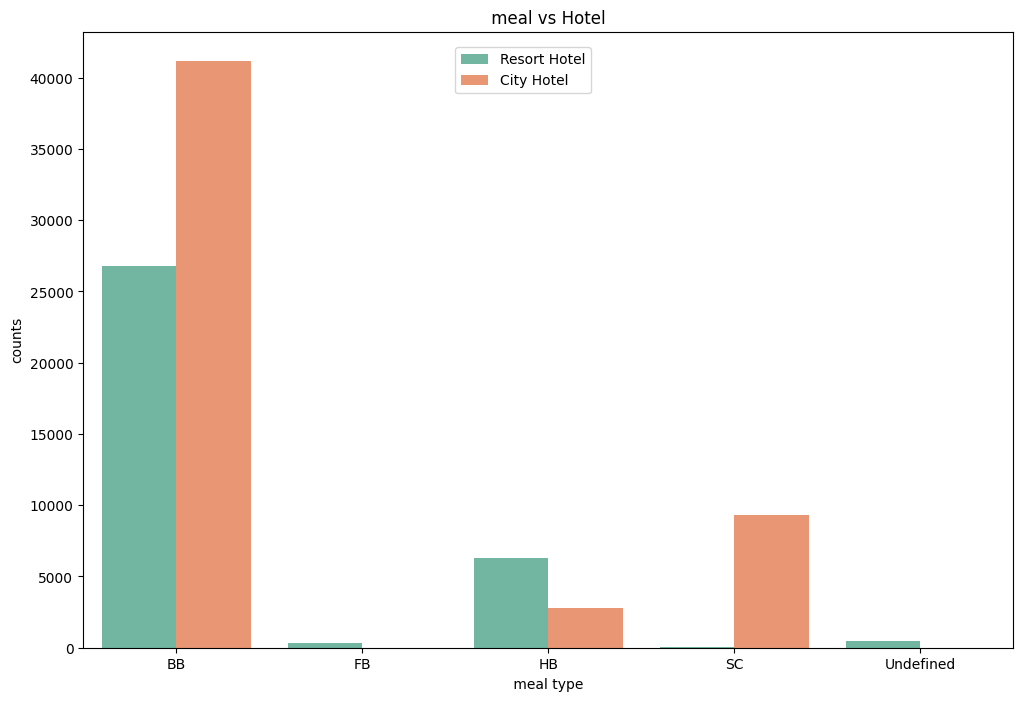

In [50]:
#is_canceled_df=df['is_canceled'].value_counts().reset_index().rename(columns={'index': "type",'is_canceled':'Counts'})
plt.figure(figsize=(12,8))
sns.countplot(x=df['meal'],palette='Set2',hue=df['hotel'])
plt.title(" meal vs Hotel ")
plt.xlabel(' meal type ')
plt.ylabel('counts')
plt.legend(loc=(.4,.9))
plt.show()

###Observation
 From meal we can observe that City Hotel provide 'BB' and Resort Hotel provide 'HB'.

###4]How long do people stay at the hotels?

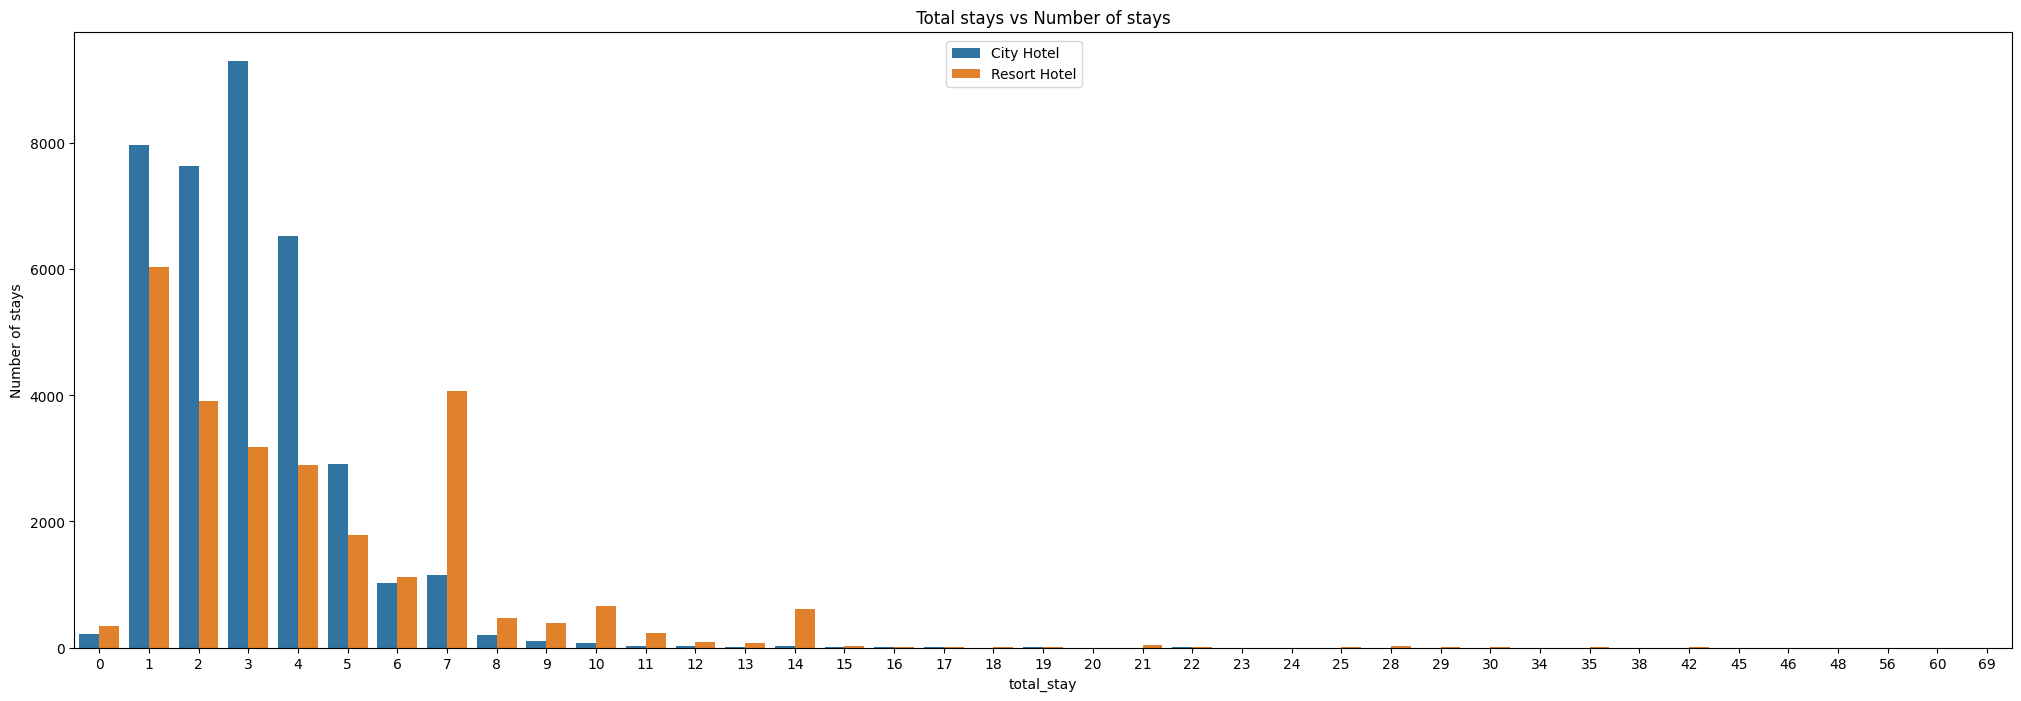

In [51]:
#booking is not cancel df2
df2=df[df['is_canceled']==0]
stay = df2.groupby(['total_stay', 'hotel']).agg('count').reset_index()
plt.figure(figsize = (25,8))
#renaming the 
stay = stay.rename(columns={'is_canceled':'Number of stays'})
sns.barplot(x = 'total_stay', y = 'Number of stays',data= stay,hue='hotel')
plt.title(" Total stays vs Number of stays ")
plt.legend(loc=(.45,.91))
plt.show()

###observations
Most people prefer to stay at the hotels of <=7 days.

###5]how is the Booking demand over year?

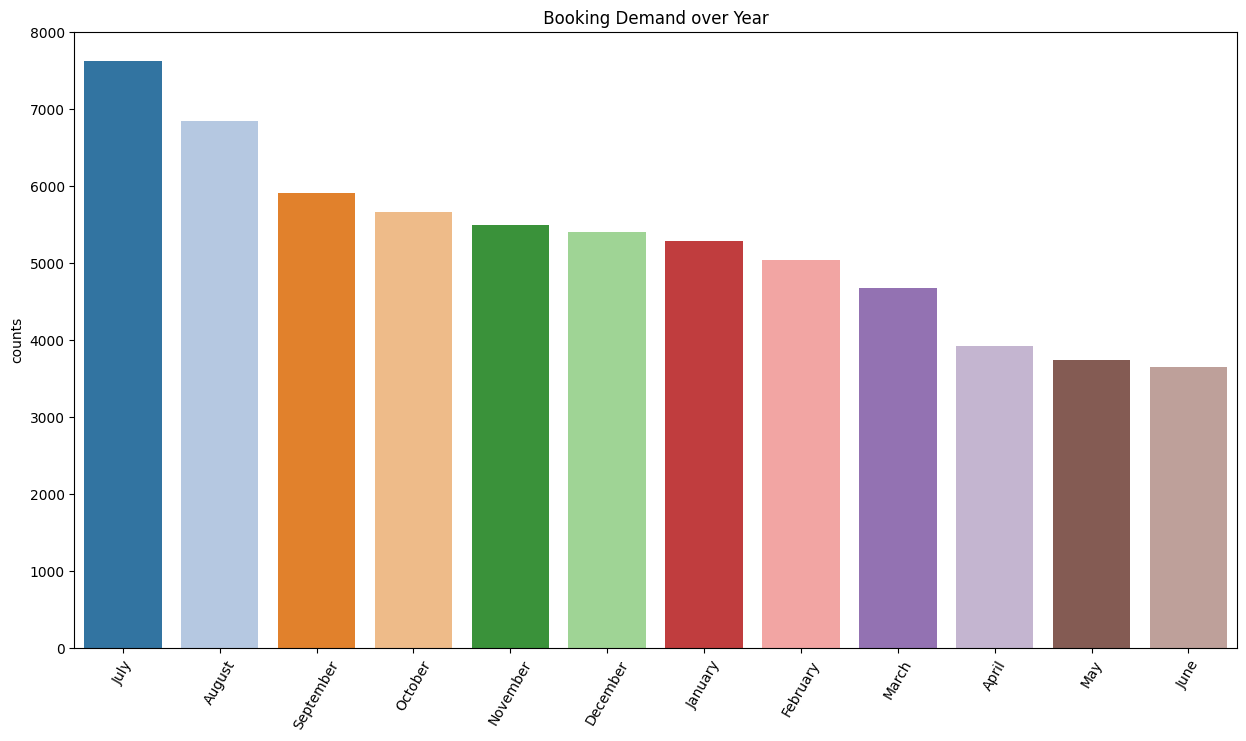

In [52]:
#booking is not cancel df2
df2=df[df['is_canceled']==0]
plt.figure(figsize = (15,8))
sns.barplot(x = df2["arrival_date_month"].unique(), y = df2["arrival_date_month"].value_counts(),palette='tab20');
plt.xticks(rotation=60)
plt.ylabel('counts')
plt.title(" Booking Demand over Year ")
plt.show();

###Observations
July is the most demanded month of the year. Interestingly, number of bookings decreased over year and June, the month before July, is the least demanded one.

###6]Type of customers arriving in different months of year

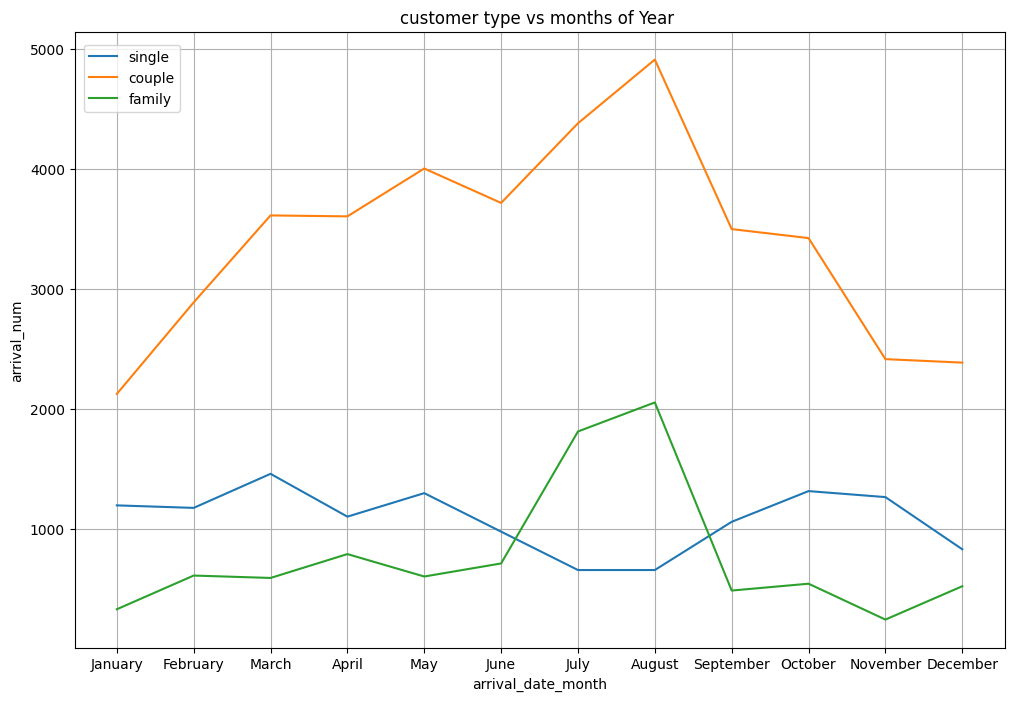

In [53]:
#booking is not cancel df2
df2=df[df['is_canceled']==0]
# Select single, couple, multiple adults and family
single   = df2[(df2['total_people']==1)]
couple   = df2[(df2['total_people']==2)]
family   = df2[df2['total_people'] > 2]

reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

fig, ax = plt.subplots(figsize=(12, 8))

for type in ['single', 'couple', 'family']:
  d1 = eval(type).groupby(['arrival_date_month']).size().reset_index().rename(columns = {0:'arrival_num'})
  d1['arrival_date_month'] = pd.Categorical(d1['arrival_date_month'],categories=reindex,ordered=True)
  sns.lineplot(data=d1, x= 'arrival_date_month', y='arrival_num', label=type, ax=ax)
  
plt.grid()
plt.title("customer type vs months of Year ")
plt.legend(loc=(.01,.87))
plt.show()

###Observations
Moslty bookings are done by couples(although we are not sure that they are couple as data doesn't tell about that).

It is clear from graph that their is a sudden surge in arrival num of couples and family in months of July and August. So better plans can be planned accordingly at that time for these type of customers

###7]Relation between ADR and Total_stay

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


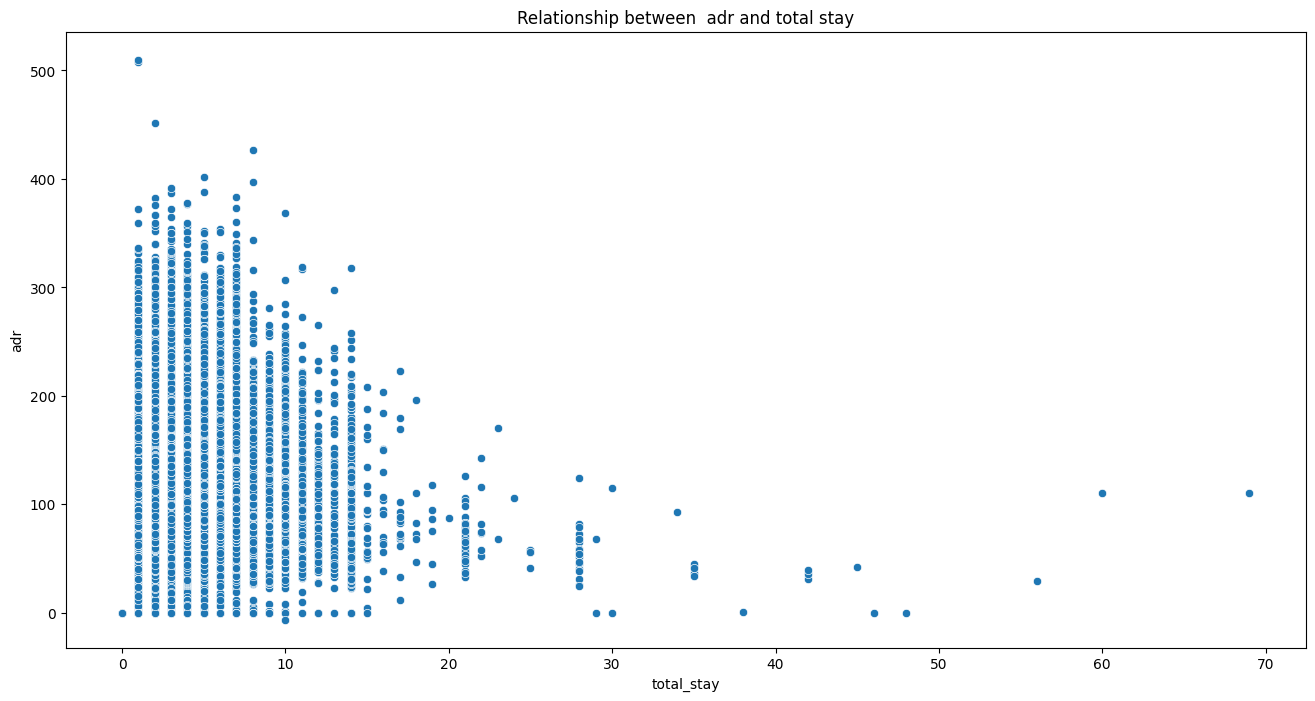

In [54]:
# Setting fontsizes,fontweight,label weight for lebels,titles.
df2.drop(df2[df2['adr'] > 5000].index, inplace = True)
plt.figure(figsize=(16,8))
sns.scatterplot(x=df2['total_stay'],y=df2['adr'])
plt.title('Relationship between  adr and total stay')
plt.show()

###Observation
From above scatter we can say that as the stay increases adr is decreasing. Thus for longer stays customer can get good adr.

###8]ADR across the different month.

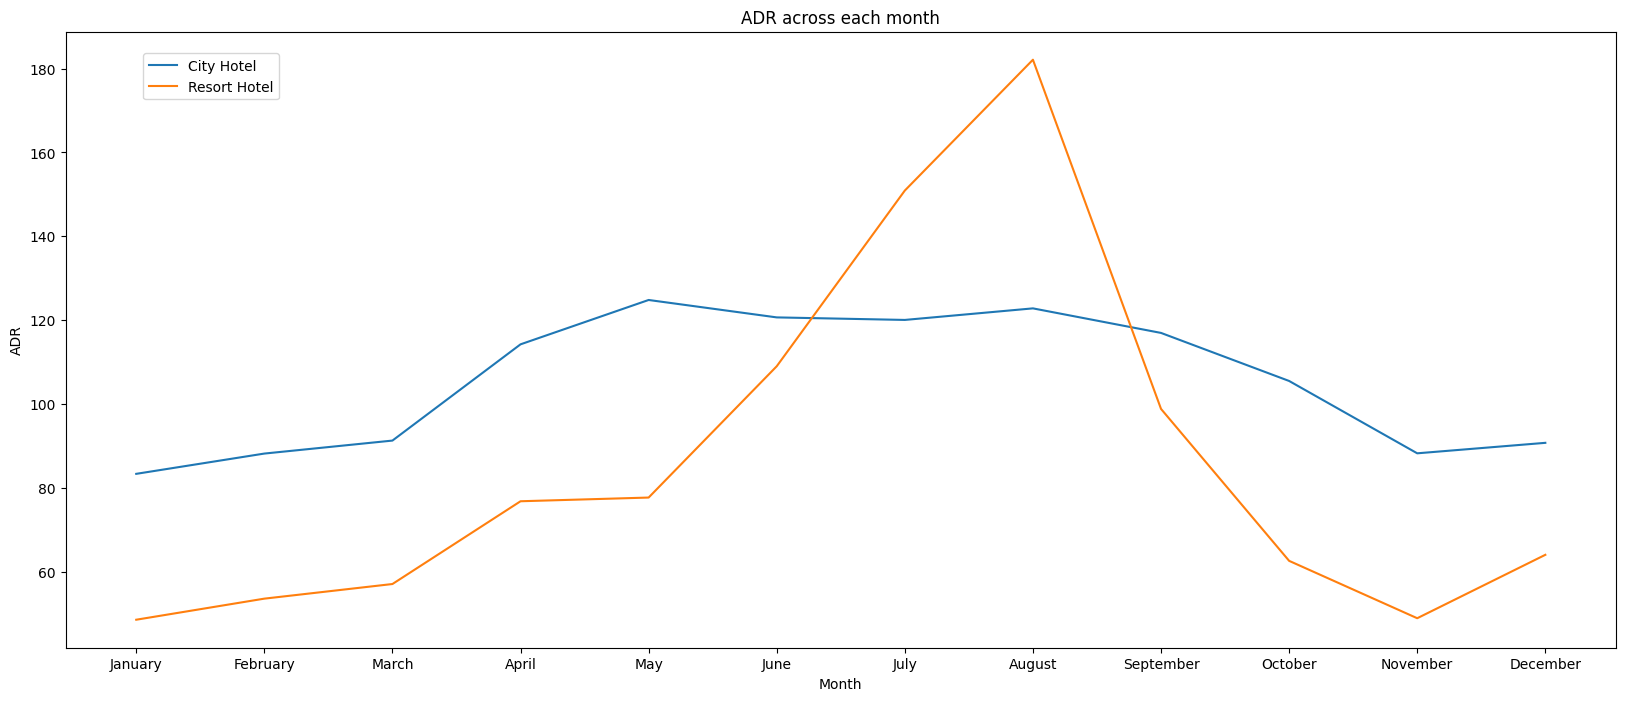

In [55]:
#group by arrival date month, hotel and avg.adr
bookings_by_month_df = df2.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()
#arranging months in orders with month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

bookings_by_month_df['arrival_date_month'] = pd.Categorical(bookings_by_month_df['arrival_date_month'],
                                                            categories = months, 
                                                            ordered=True)

bookings_by_month_df = bookings_by_month_df.sort_values('arrival_date_month')
plt.figure(figsize=(20, 8))
sns.lineplot(x=bookings_by_month_df['arrival_date_month'], 
             y=bookings_by_month_df['adr'], 
             hue=bookings_by_month_df['hotel'])

plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.legend(loc=(.05,.89))
plt.show()


###Obervation
For Resort hotel adr is high in the month June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

##Let's find  Rating provided by customers, which help us to find out the reasons for booking  cancelation of Hotels.

###Ratings Provided by the customers on different features of the hotels:-

In [56]:
#Groupby ['hotel','total_stay','assigned_room_type','reserved_room_type','meal','total_of_special_requests','adr','days_in_waiting_list'] for analysing data
data_for_rating=(df2.groupby(['hotel','total_stay','assigned_room_type','reserved_room_type','meal','total_of_special_requests','adr','days_in_waiting_list',]).agg('count').reset_index()).iloc[:,0:8]
dfr=data_for_rating
dfr

,hotel,total_stay,assigned_room_type,reserved_room_type,meal,total_of_special_requests,adr,days_in_waiting_list
0,City Hotel,0,A,A,BB,0,0.00,0
1,City Hotel,0,A,A,BB,0,0.00,98
2,City Hotel,0,A,A,BB,1,0.00,0
3,City Hotel,0,A,A,BB,2,0.00,0
4,City Hotel,0,A,A,HB,0,0.00,0
...,...,...,...,...,...,...,...,...
36587,Resort Hotel,45,D,A,BB,3,42.11,0
36588,Resort Hotel,46,I,A,SC,1,0.00,0
36589,Resort Hotel,56,A,A,BB,0,28.79,0
36590,Resort Hotel,60,E,E,HB,3,110.50,0


### There are 36592 hotels to which customers are giving ratings according to different features of the hotels.

In [57]:
#Defining Different Rating Functions To Get Ratings Of Hotels from customers
def rating1(reserved_room_type,assigned_room_type):
  '''If reserved_room_type and assigned_room_type is same then the customer will give rating1=1 else rating1=0 to hotel. '''
  if reserved_room_type==assigned_room_type:
   # if reserved_room_type=='A':
     # rating=1
    rating=1
  else:
    rating=0 
  return rating   
def rating2(adr):
  '''If adr is less than 150 then the customer will give rating2=1 and in between 150-200 rating2=0.5 else rating2=0 to hotel. '''
  if adr<150.0 and adr>0.0:
    rating=1
  elif adr>150.0 and adr<200.0:
    rating=.5
  else:
    rating=0 
  return rating
def rating3(meal):
  '''If meal type is FB or HB then the customer will give rating3=1 and if BB or Sc rating3=0.5 else rating3=0 to hotel. '''
  if  meal=='FB'or meal=='HB':
    rating=1
  elif  meal=='BB'or meal=='SC':
      rating=.5
  else:
    rating=0 
  return rating  
def rating4(days_in_waiting_list):
  '''If waiting days in list is less than 15 then the customer will give rating4=1  and in between 15-30 rating4=0.5 else rating4=0 to hotel. '''
  if days_in_waiting_list<15:
    rating=1
  elif days_in_waiting_list<30 and days_in_waiting_list>15:
    rating=.5
  else:
    rating=0 
  return rating 
def rating5(adr,total_of_special_requests):
  '''If customer get adr less than 200 with more than 1 special requests(for ex:- Free Wifi,Room Service,Seaview,Complimentary Toiletries.) then the customer will give rating5=1 else rating5=0 to hotel. '''
  if adr<=200  and total_of_special_requests>1:
    rating=1
  elif adr<=120 and total_of_special_requests>=0 and total_of_special_requests<2:
    rating=.5
  else:
    rating=0 
  return rating  

### Applying lambda function on data for ratings i.e dfr

In [58]:
dfr['rating1']=dfr.apply(lambda x:rating1(x['reserved_room_type'],x['assigned_room_type']),axis=1)

In [59]:
dfr['rating2']=dfr.apply(lambda x:rating2(x['adr']),axis=1)

In [60]:
dfr['rating3']=dfr.apply(lambda x:rating3(x['meal']),axis=1)

In [61]:
dfr['rating4']=dfr.apply(lambda x:rating4(x['days_in_waiting_list']),axis=1)

In [62]:
dfr['rating5']=dfr.apply(lambda x:rating5(x['adr'],x['total_of_special_requests']),axis=1)

In [63]:
dfr['Final_Rating']=dfr['rating1']+dfr['rating2']+dfr['rating3']+dfr['rating4']+dfr['rating5']

In [64]:
dfr

,hotel,total_stay,assigned_room_type,reserved_room_type,meal,total_of_special_requests,adr,days_in_waiting_list,rating1,rating2,rating3,rating4,rating5,Final_Rating
0,City Hotel,0,A,A,BB,0,0.00,0,1,0.0,0.5,1.0,0.5,3.0
1,City Hotel,0,A,A,BB,0,0.00,98,1,0.0,0.5,0.0,0.5,2.0
2,City Hotel,0,A,A,BB,1,0.00,0,1,0.0,0.5,1.0,0.5,3.0
3,City Hotel,0,A,A,BB,2,0.00,0,1,0.0,0.5,1.0,1.0,3.5
4,City Hotel,0,A,A,HB,0,0.00,0,1,0.0,1.0,1.0,0.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36587,Resort Hotel,45,D,A,BB,3,42.11,0,0,1.0,0.5,1.0,1.0,3.5
36588,Resort Hotel,46,I,A,SC,1,0.00,0,0,0.0,0.5,1.0,0.5,2.0
36589,Resort Hotel,56,A,A,BB,0,28.79,0,1,1.0,0.5,1.0,0.5,4.0
36590,Resort Hotel,60,E,E,HB,3,110.50,0,1,1.0,1.0,1.0,1.0,5.0


###Ploting diifferent  SUBPlots of rating and Analysing the Final Ratings

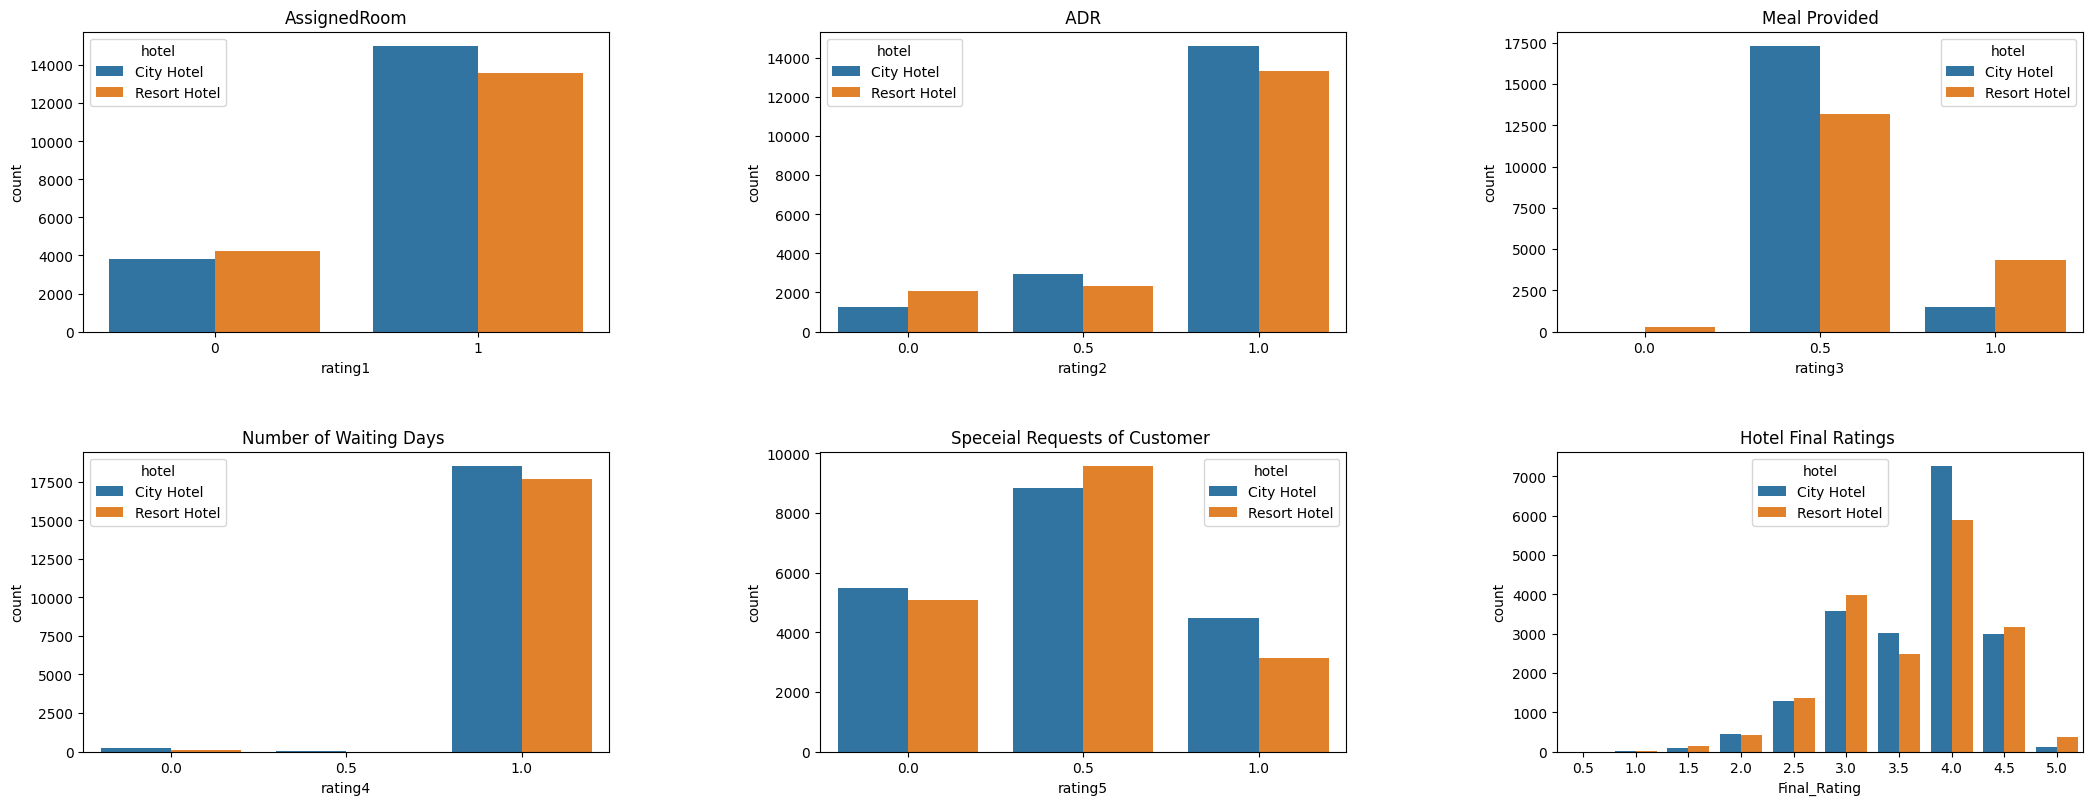

In [65]:
plt.figure( figsize=(25, 9))
plt.subplot(2,3,1)
sns.countplot(x= dfr['rating1'],palette='tab10',hue=dfr['hotel'])
plt.title("AssignedRoom")
plt.subplot(2,3,2)
sns.countplot(x= dfr['rating2'],palette='tab10',hue=dfr['hotel'])
plt.title(" ADR ")
plt.subplot(2,3,3)
sns.countplot(x= dfr['rating3'],palette='tab10',hue=dfr['hotel'])
plt.title("Meal Provided")
plt.subplot(2,3,4)
sns.countplot(x= dfr['rating4'],palette='tab10',hue=dfr['hotel'])
plt.title("Number of Waiting Days ")
plt.subplot(2,3,5)
sns.countplot(x= dfr['rating5'],palette='tab10',hue=dfr['hotel'])
plt.title("Speceial Requests of Customer ")
plt.subplot(2,3,6)
sns.countplot(x= dfr['Final_Rating'],palette='tab10',hue=dfr['hotel'])
plt.title("Hotel Final Ratings ")
# set the spacing between subplots

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


###Observations:-
1]Both the hotels will provide the reserved room to the guests.

2]City hotels are less expensive as compared to resort hotels.

3]Resort hotels are  providing meal  type (FB or HB) where as maximum city hotels are providing meal type (BB or SC).

4]Most of the City and Resort hotels have waitng time less than 15 days.

5]Maxmimum customer giving 0.5 ratings according to there special requests
and  very few hotels providing reserved room with special requests of customer because of that raing is less than 1.

###Final Rating

There are around 7K City hotels and 6k resort hotels  with rating 4 out of 36K hotel rating given by the customer.

Resort hotels have 4.5 above raings as compared to city hotels but less number of such  resort hotels. 

###Correlation Heat map

In [66]:
hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Text(0.5, 1.0, 'Co-relation of the columns')

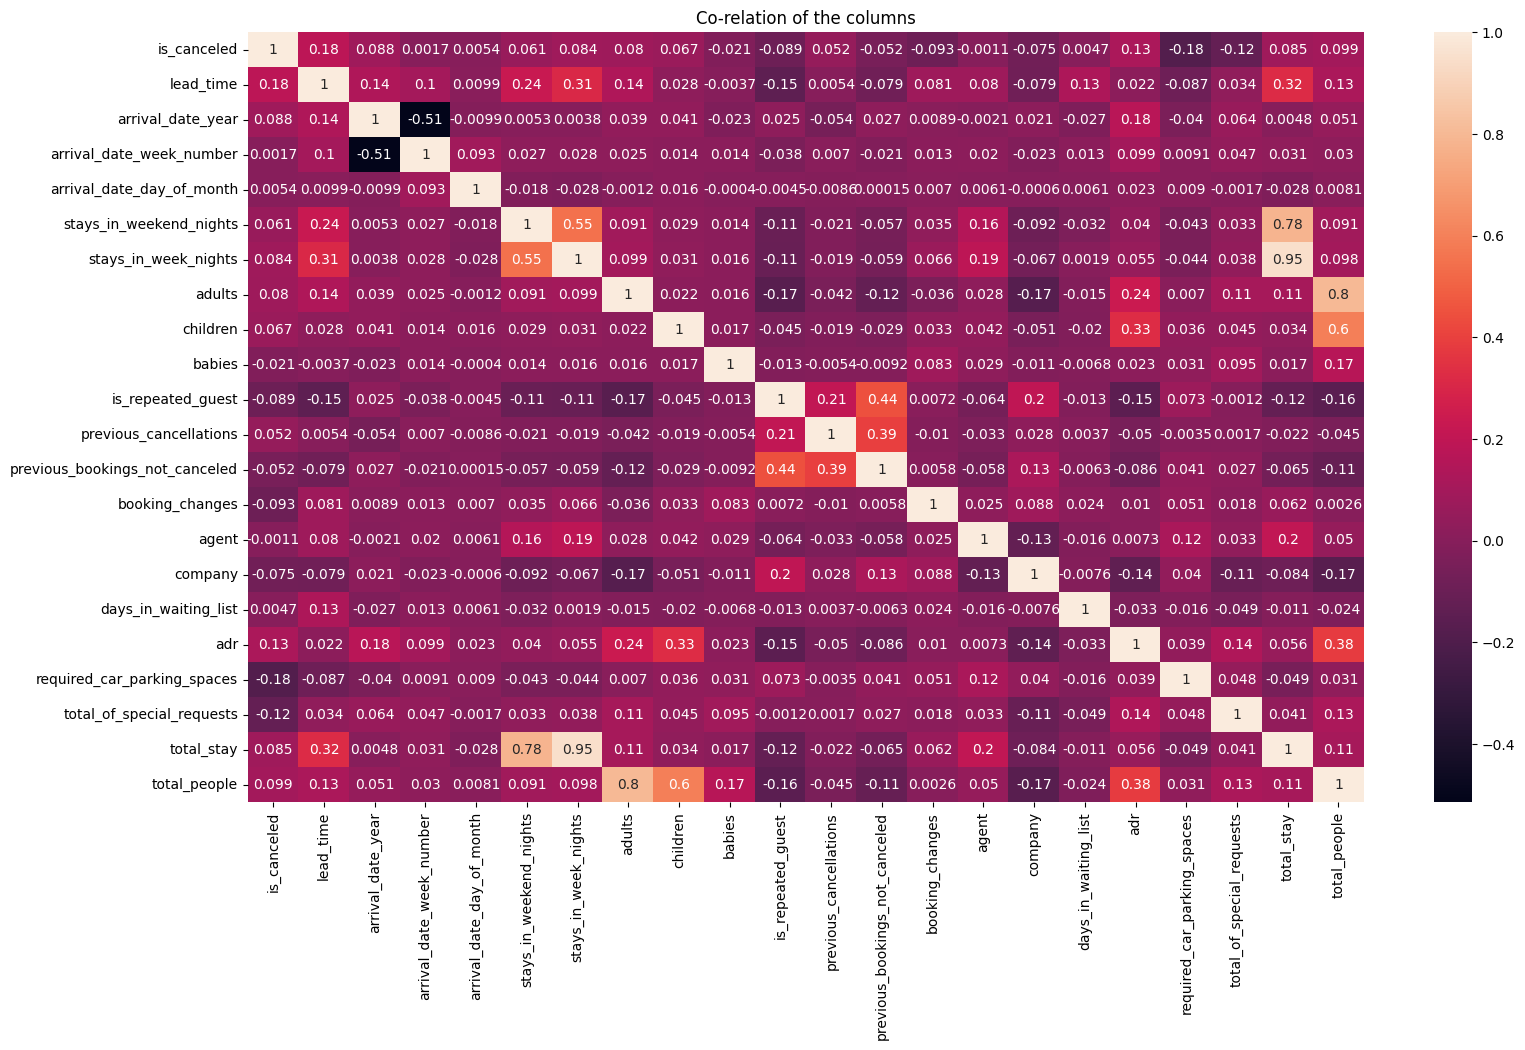

In [67]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Co-relation of the columns')

###Observations
 
1) lead_time and total_stay is positively corelated.

2)adr and total people are positively corelated .

3) is_repeated guest and previous bookings not canceled has strong corelation. 

###Conclusions:-

Complete Conclusion of data:(Summary)

1. 61% is City Hotel is 39% is Resort Hotel
2. Most of the market segment used is Online Travel Agency and Offline Tour Agent.
3. 27.5% booking has been canceled.
4. 80% distribution channel is TA/TO
5. maximum guest book room type A.
6. Only 3.9% guests are repeated and remaining all are new guests.
7. 91.6 % guests did not require the parking space. only 8.3 % guests required only 1 parking space.
8. Agent number 9 made the most booking more than 25k.
9. Most preferred meal type is BB (Bed and breakfast).
10. 2016 Year has the most bookings 40k, 2015 has less than 15k bookings
11. People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe guests are from PRT are happen to choose Resort Hotel more than City Hotel.
12. Almost 98 % of the guests prefer "No deposit" type of deposit so more chances of booking cancelation.
13. Booking cancelation of city hotel is more as compared to resort hotel.
14. Most people prefer to stay at the city hotels of for maximum 7 days for more than 7 days stay people prefer resort hotels. 
15. July is the most demanded month of the year. Interestingly, number of bookings decreased over year and June, the month before July, is the least demanded one.
16. stay increases ADR is decreasing and For Resort hotel ADR is high in the month June, July, August as compared to City Hotels.
17. Very less number hotels with rating above 4.0 so that can be reason for the booking cancelations. 

